# Crime Data - NSW

This set of data explores the offence type, month and local government of crimes throughout New South Wales, Australia between the years of 1995 and 2012. 

[NSW Crime Data](http://data.gov.au/storage/f/2013-09-12T23%3A32%3A36.918Z/rci-offencebymonth.csv)

In [61]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 15)
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

if os.path.isfile("rci-offencebymonth.csv"):
    filepath = "rci-offencebymonth.csv"
    print("loading from file")
else:
    filepath = "http://data.gov.au/storage/f/2013-09-12T23%3A32%3A36.918Z/rci-offencebymonth.csv"
    print("loading from the internet")

crime_data = pd.read_csv(filepath)
print("DONE!")

loading from file
DONE!


Crime Data Table

In [19]:
crime_data.head(9610)

,Statistical Division,LGA,Offence category,Subcategory,Jan_1995,Feb_1995,Mar_1995,Apr_1995,May_1995,Jun_1995,...,Mar_2012,Apr_2012,May_2012,Jun_2012,Jul_2012,Aug_2012,Sep_2012,Oct_2012,Nov_2012,Dec_2012
0,Inner Sydney,Botany Bay,Homicide,Murder (a),0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Inner Sydney,Botany Bay,Homicide,Attempted murder,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Inner Sydney,Botany Bay,Homicide,"Murder accessory, conspiracy",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Inner Sydney,Botany Bay,Homicide,Manslaughter (a),0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Inner Sydney,Botany Bay,Assault,Domestic violence related assault,3.0,7.0,5.0,1.0,3.0,4.0,...,17.0,9.0,16.0,10.0,8.0,6.0,11.0,11.0,14.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9605,Prisons etc,Prisons,Against justice procedures,Fail to appear,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9606,Prisons etc,Prisons,Against justice procedures,Resist or hinder officer,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9607,Prisons etc,Prisons,Against justice procedures,Other offences against justice procedures,8.0,5.0,18.0,5.0,3.0,6.0,...,2.0,2.0,0.0,6.0,2.0,2.0,2.0,3.0,0.0,4.0
9608,Prisons etc,Prisons,Transport regulatory offences,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Total Number of Rows and Columns

In [20]:
crime_data.shape

(9614, 220)

Crime Data Column Titles

In [21]:
crime_data.columns

Index(['Statistical Division', 'LGA', 'Offence category', 'Subcategory',
       'Jan_1995', 'Feb_1995', 'Mar_1995', 'Apr_1995', 'May_1995', 'Jun_1995',
       ...
       'Mar_2012', 'Apr_2012', 'May_2012', 'Jun_2012', 'Jul_2012', 'Aug_2012',
       'Sep_2012', 'Oct_2012', 'Nov_2012', 'Dec_2012'],
      dtype='object', length=220)

All listed Offence Categories and Total Number of occurances

In [22]:
crime_data["Offence category"].value_counts()

Drug offences                                             2480
Theft                                                     1705
Against justice procedures                                 930
Homicide                                                   620
Disorderly conduct                                         620
Assault                                                    465
Robbery                                                    465
Sexual offences                                            310
Blackmail and extortion                                    155
Harassment, threatening behaviour and private nuisance     155
Betting and gaming offences                                155
Transport regulatory offences                              155
Other offences against the person                          155
Prohibited and regulated weapons offences                  155
Arson                                                      155
Abduction and kidnapping                               

Text(0.5, 0, 'Number of Occurances')

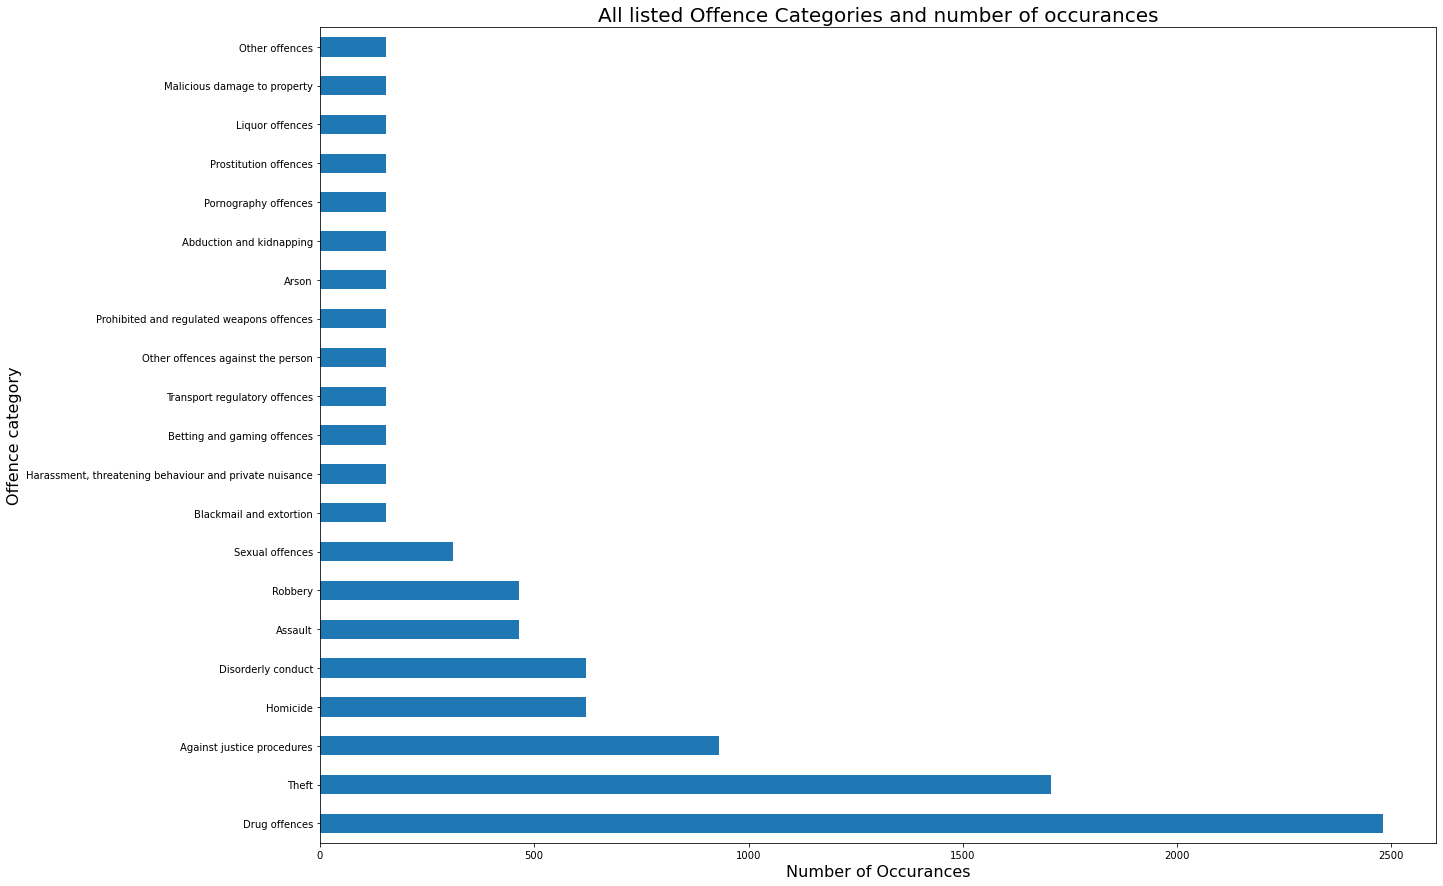

In [78]:
crime_data["Offence category"].value_counts().plot(kind="barh")
plt.title("All listed Offence Categories and number of occurances", fontsize=20)
plt.ylabel('Offence category', fontsize = 16)
plt.xlabel('Number of Occurances', fontsize = 16)

All listed Subcategories

In [24]:
crime_data["Subcategory"].value_counts()

Robbery with a weapon not a firearm                             155
Possession and/or use of narcotics                              155
Breach Apprehended Violence Order                               155
Non-domestic violence related assault                           155
Break and enter non-dwelling                                    155
Dealing, trafficking in amphetamines                            155
Escape custody                                                  155
Dealing, trafficking in cocaine                                 155
Steal from dwelling                                             155
Other offences against justice procedures                       155
Trespass                                                        155
Resist or hinder officer                                        155
Murder (a)                                                      155
Other drug offences                                             155
Dealing, trafficking in cannabis                

Total Number of Offences each Year in correspondence to Statistical Division

<AxesSubplot:>

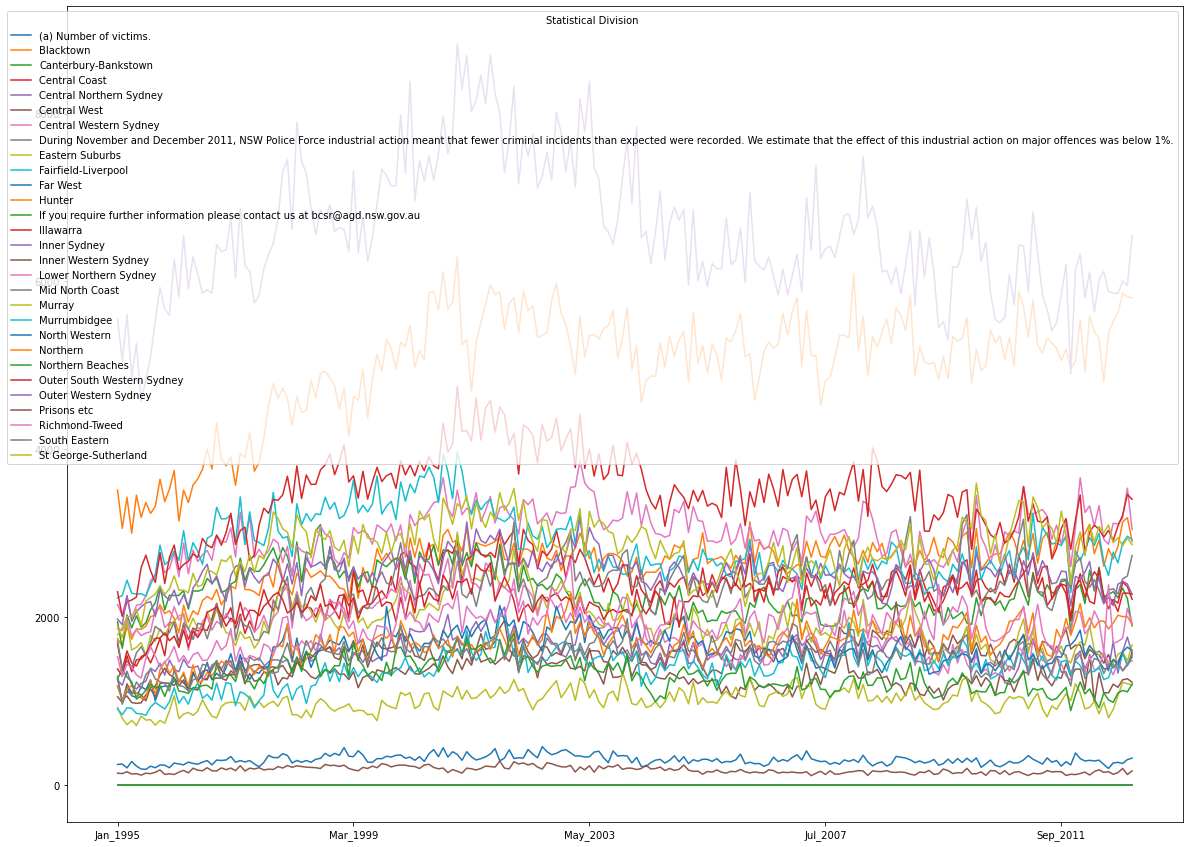

In [17]:
crime_data.groupby('Statistical Division').sum().T.plot()

In [4]:
from datetime import datetime
def nice_datestamp(thing_to_try):
    try:
        dt = datetime.strptime("Mar_1995", "%b_%Y")
        return dt
    except:
        return thing_to_try
 
crime_data.columns = [nice_datestamp(x) for x in crime_data.columns]

In [11]:
crime_data.head()

,1995-03-01,1995-03-01,1995-03-01,1995-03-01,1995-03-01,1995-03-01,1995-03-01,1995-03-01,1995-03-01,1995-03-01,...,1995-03-01,1995-03-01,1995-03-01,1995-03-01,1995-03-01,1995-03-01,1995-03-01,1995-03-01,1995-03-01,1995-03-01
0,Inner Sydney,Botany Bay,Homicide,Murder (a),0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Inner Sydney,Botany Bay,Homicide,Attempted murder,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Inner Sydney,Botany Bay,Homicide,"Murder accessory, conspiracy",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Inner Sydney,Botany Bay,Homicide,Manslaughter (a),0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Inner Sydney,Botany Bay,Assault,Domestic violence related assault,3.0,7.0,5.0,1.0,3.0,4.0,...,17.0,9.0,16.0,10.0,8.0,6.0,11.0,11.0,14.0,20.0


Text(0.5, 1.0, 'Total number of offences per Month/Year correspondence to Statistical Division')

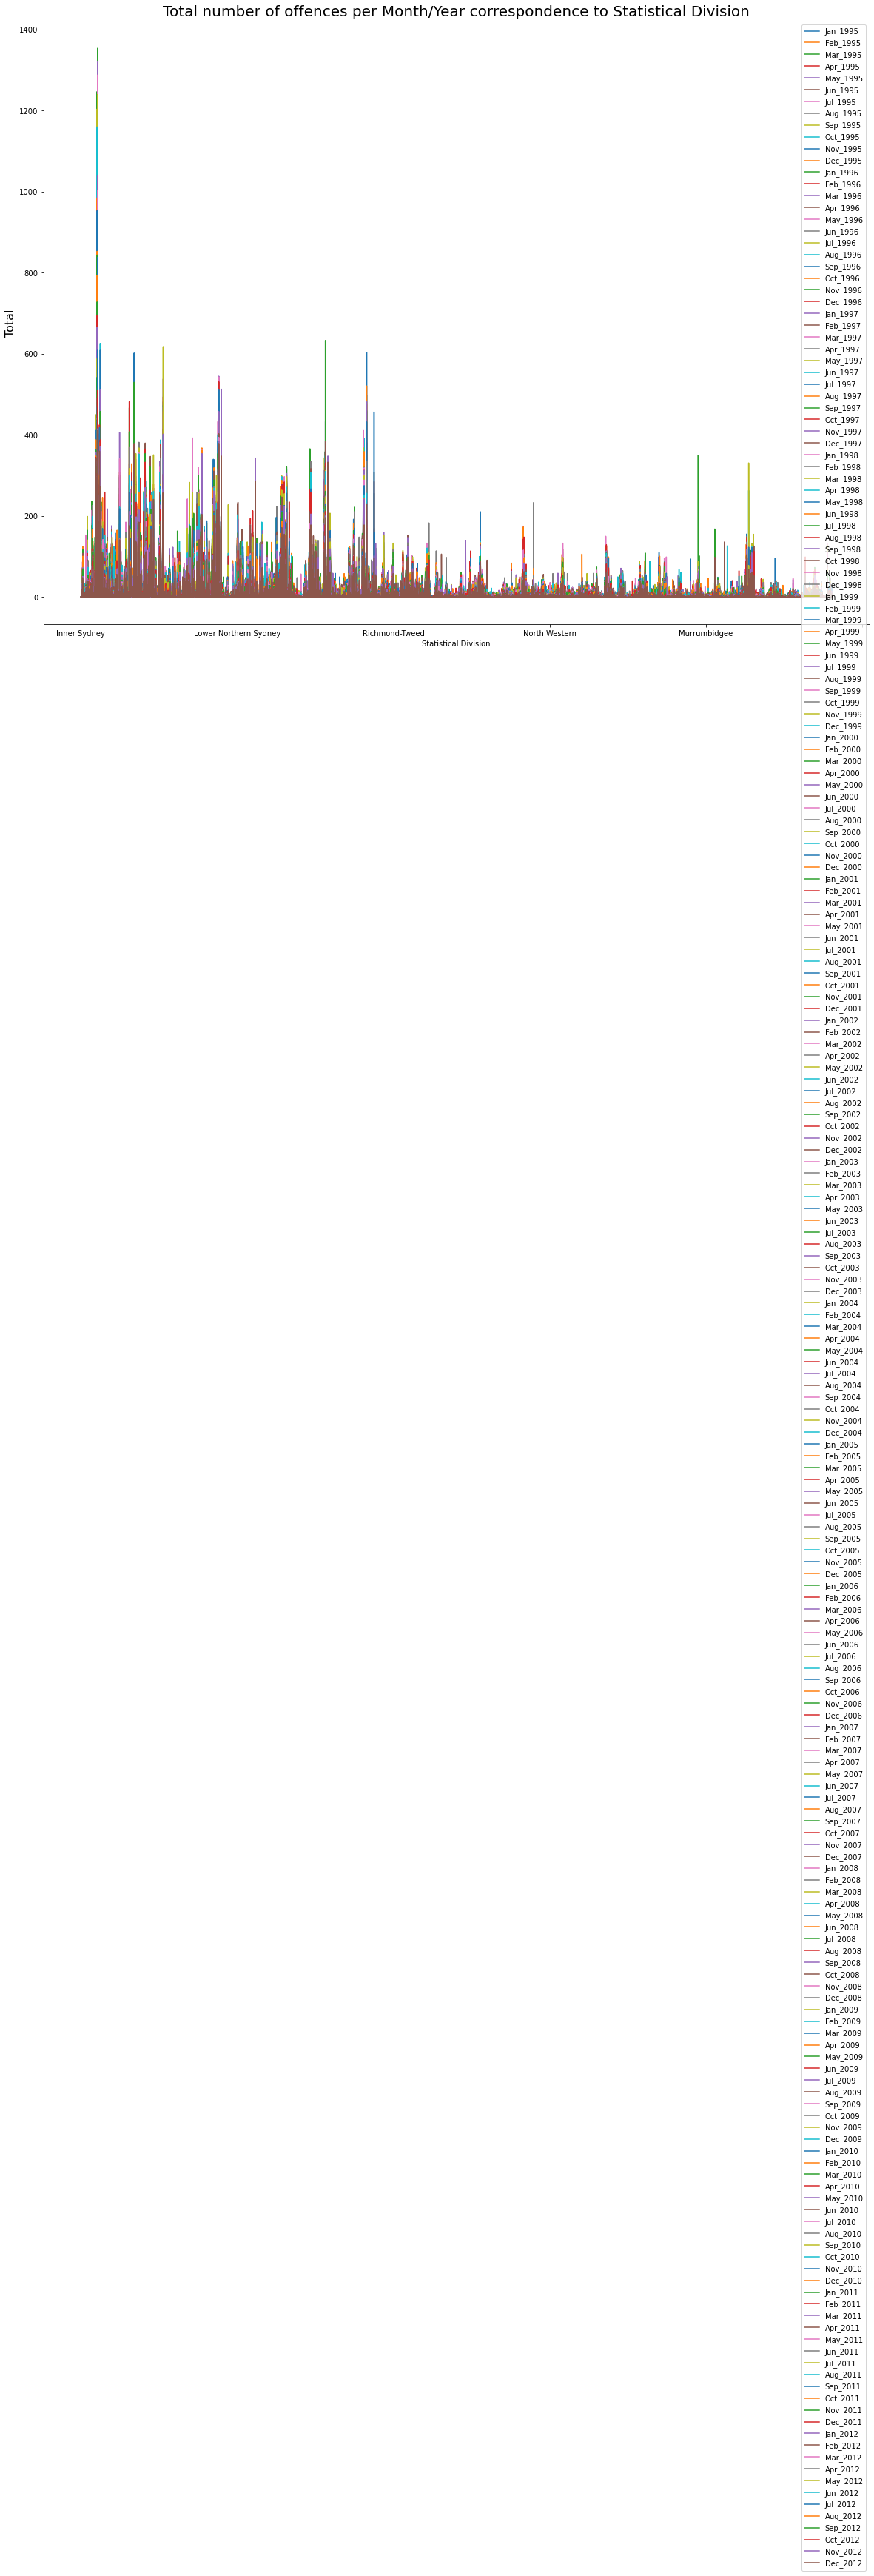

In [8]:
crime_data.set_index('Statistical Division').plot(fontsize = 10)
plt.ylabel('Total', fontsize = 16)
plt.title("Total number of offences per Month/Year correspondence to Statistical Division", fontsize=20)

Over all Crime Data over a Single Year

In [25]:
crime_data_2005 = crime_data[['Statistical Division','Jan_2005','Feb_2005','Mar_2005','Apr_2005','May_2005','Jun_2005','Jul_2005','Aug_2005','Sep_2005','Oct_2005','Nov_2005','Dec_2005']]
crime_data_2005.head(9610)

,Statistical Division,Jan_2005,Feb_2005,Mar_2005,Apr_2005,May_2005,Jun_2005,Jul_2005,Aug_2005,Sep_2005,Oct_2005,Nov_2005,Dec_2005
0,Inner Sydney,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Inner Sydney,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Inner Sydney,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Inner Sydney,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Inner Sydney,11.0,5.0,8.0,14.0,14.0,13.0,13.0,10.0,11.0,11.0,10.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9605,Prisons etc,0.0,1.0,4.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
9606,Prisons etc,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0
9607,Prisons etc,0.0,1.0,1.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,0.0
9608,Prisons etc,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Total number of offences in the year of 2005')

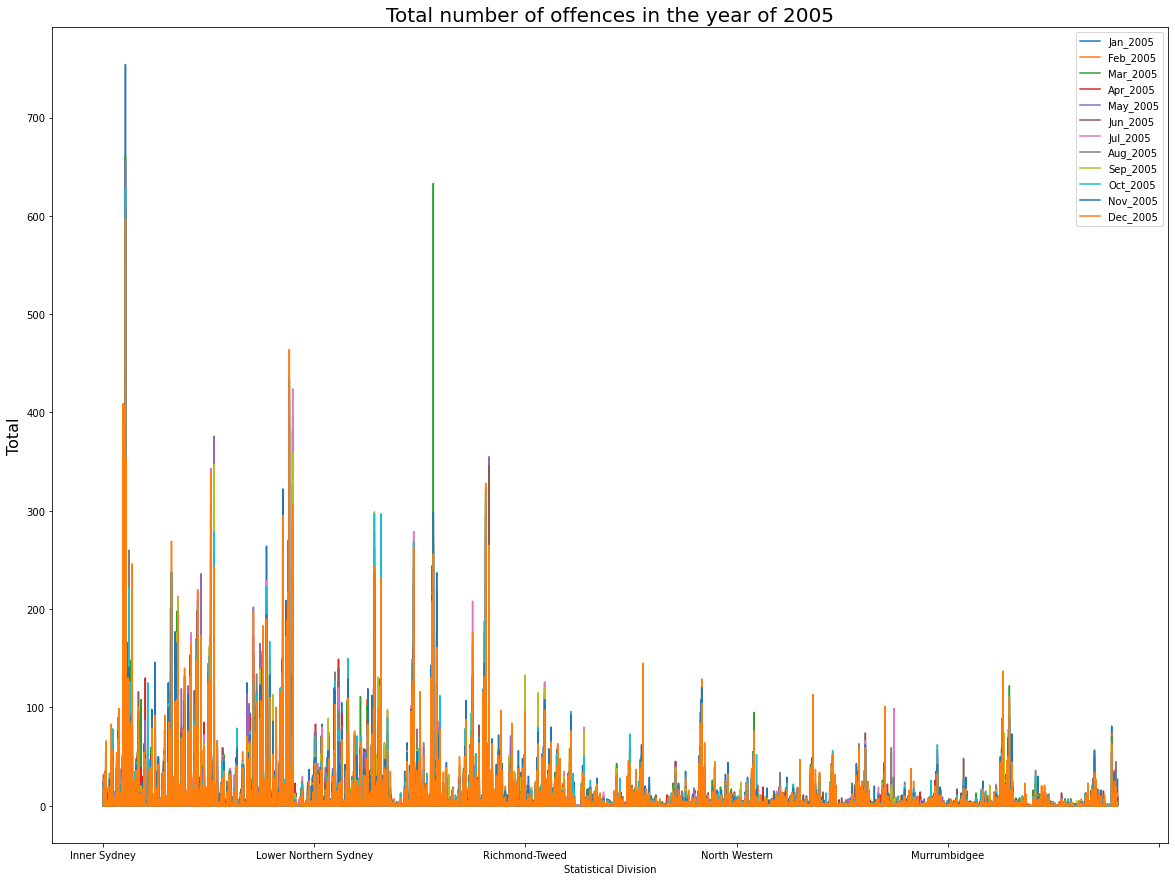

In [26]:
crime_data_2005.set_index('Statistical Division').plot(fontsize = 10)
plt.ylabel('Total', fontsize = 16)
plt.title("Total number of offences in the year of 2005", fontsize=20)

Over all Crime Data on Offence categories in December 2005

In [27]:
crime_data_Dec_2005 = crime_data[['Statistical Division','Offence category','Dec_2005']]
crime_data_Dec_2005.head(9610)

,Statistical Division,Offence category,Dec_2005
0,Inner Sydney,Homicide,0.0
1,Inner Sydney,Homicide,0.0
2,Inner Sydney,Homicide,0.0
3,Inner Sydney,Homicide,0.0
4,Inner Sydney,Assault,9.0
...,...,...,...
9605,Prisons etc,Against justice procedures,0.0
9606,Prisons etc,Against justice procedures,0.0
9607,Prisons etc,Against justice procedures,0.0
9608,Prisons etc,Transport regulatory offences,0.0


Text(0.5, 1.0, 'Total number of offences December 2005')

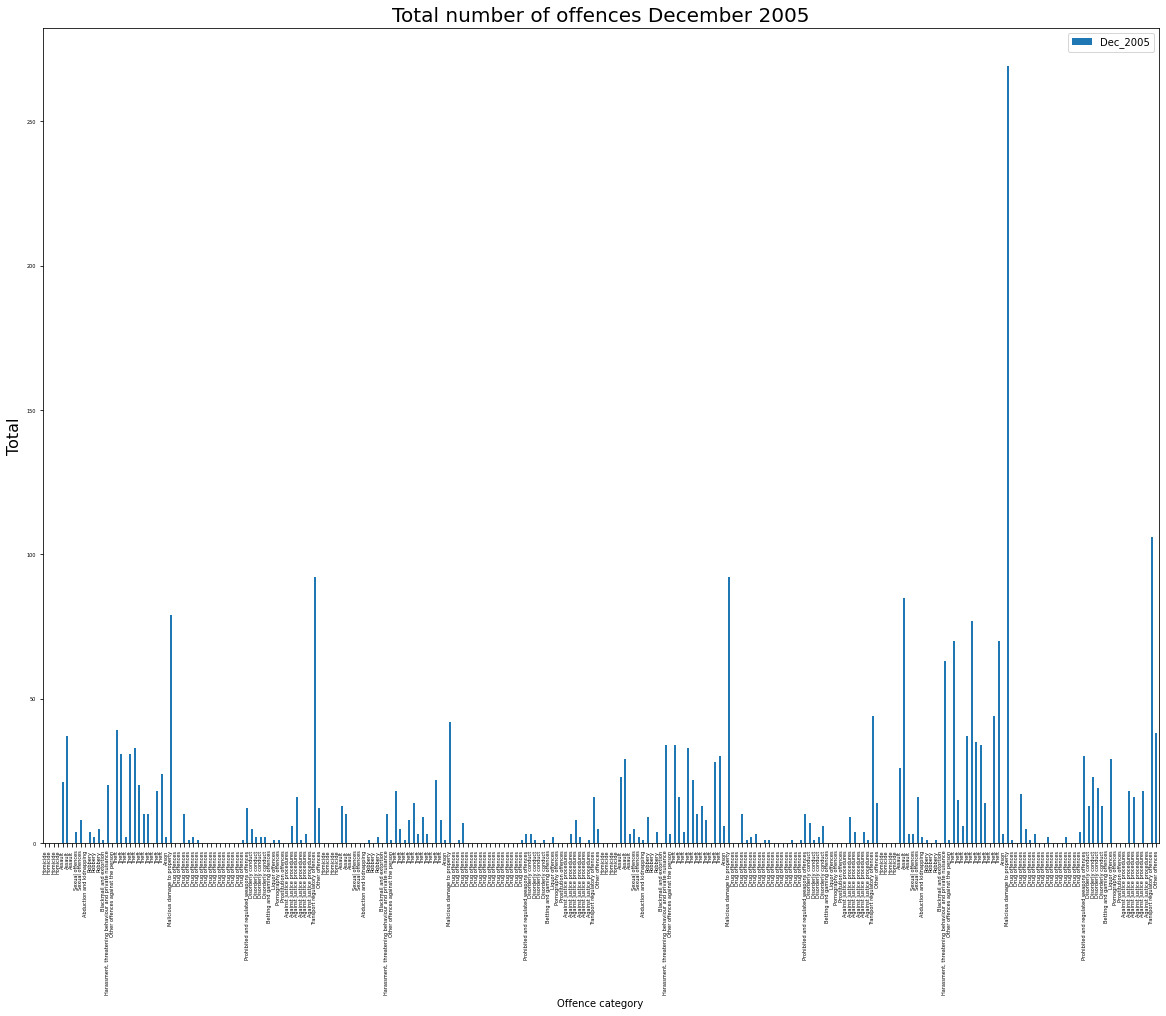

In [52]:
for name, df in crime_data_Dec_2005.groupby('Statistical Division'):
    name,df.head()

name,df.set_index('Offence category').plot(kind = "bar", fontsize = 5)
plt.ylabel('Total', fontsize = 16)
plt.title("Total number of offences December 2005", fontsize=20)

Over all Crime Data in St George-Sutherland (Statistical Division) in December 2005

In [29]:
StGeorge_Sutho_group = crime_data.groupby(['Statistical Division'])
StGeorge_Sutho = StGeorge_Sutho_group.get_group('St George-Sutherland')

crime_data_St_Sutho = StGeorge_Sutho[['Statistical Division','LGA','Offence category','Dec_2005']]
crime_data_St_Sutho.head(248)

,Statistical Division,LGA,Offence category,Dec_2005
434,St George-Sutherland,Hurstville,Homicide,0.0
435,St George-Sutherland,Hurstville,Homicide,0.0
436,St George-Sutherland,Hurstville,Homicide,0.0
437,St George-Sutherland,Hurstville,Homicide,0.0
438,St George-Sutherland,Hurstville,Assault,21.0
...,...,...,...,...
677,St George-Sutherland,Sutherland Shire,Against justice procedures,0.0
678,St George-Sutherland,Sutherland Shire,Against justice procedures,18.0
679,St George-Sutherland,Sutherland Shire,Against justice procedures,0.0
680,St George-Sutherland,Sutherland Shire,Transport regulatory offences,106.0


Text(0.5, 1.0, 'Total number of offences in St George-Sutherland Statistical Division, December 2005')

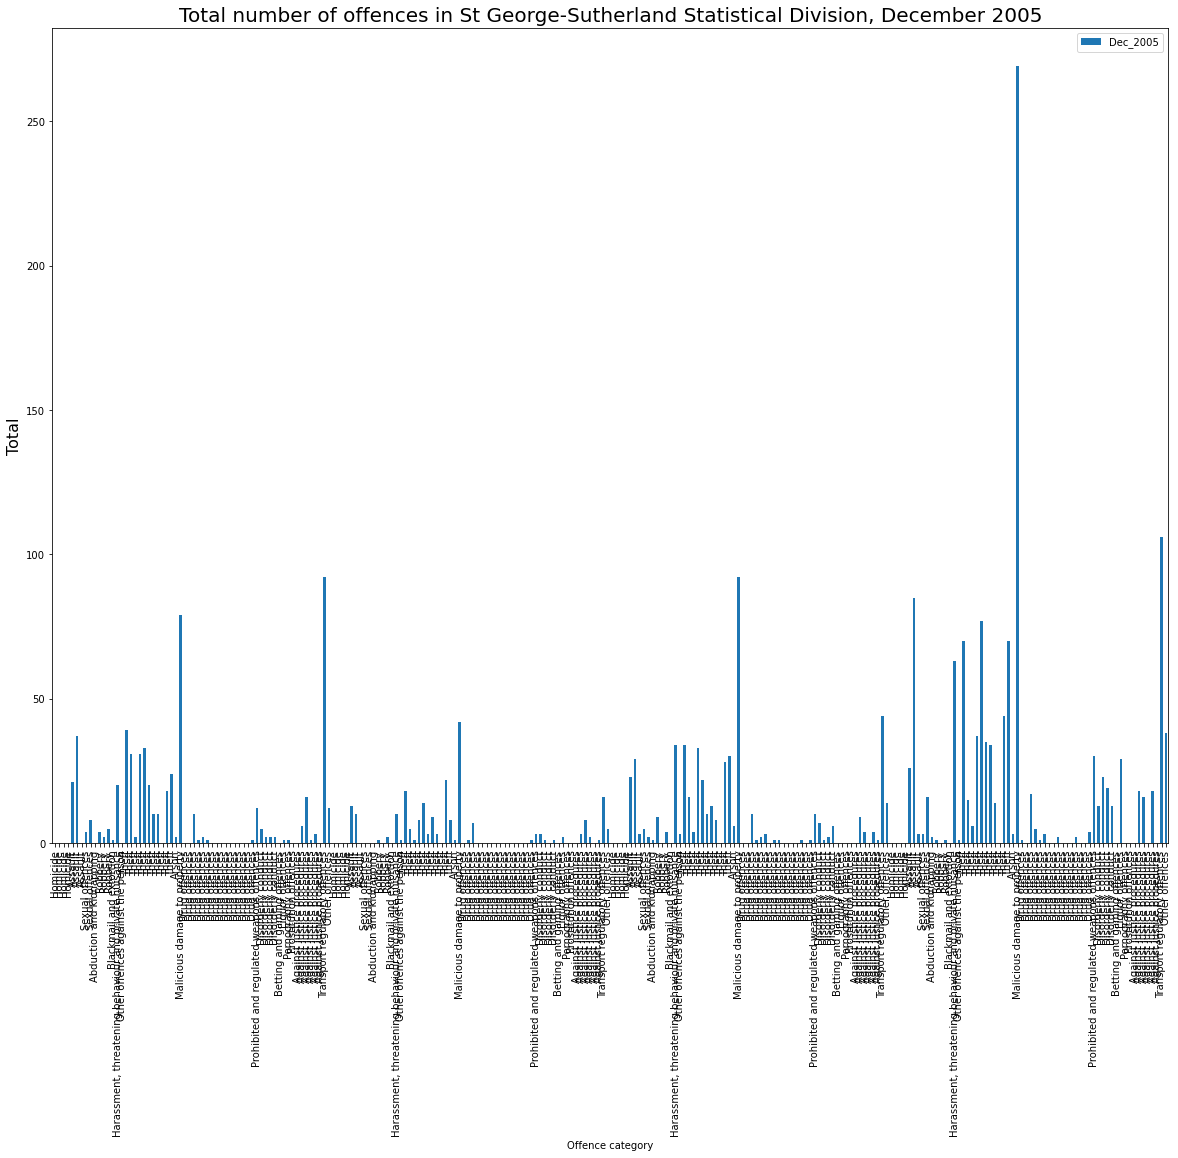

In [50]:
crime_data_St_Sutho.set_index('Offence category').plot(kind="bar")
plt.ylabel('Total', fontsize = 16)
plt.title("Total number of offences in St George-Sutherland Statistical Division, December 2005", fontsize=20)

Over all Crime Data in Sutherland Shire (LGA) in December 2005

In [31]:
Sutho_group = crime_data_St_Sutho.groupby(['LGA'])
Sutherland_Shire = Sutho_group.get_group('Sutherland Shire')

crime_data_Sutho = Sutherland_Shire[['LGA','Offence category','Dec_2005']]
crime_data_Sutho.head(100)

,LGA,Offence category,Dec_2005
620,Sutherland Shire,Homicide,0.0
621,Sutherland Shire,Homicide,0.0
622,Sutherland Shire,Homicide,0.0
623,Sutherland Shire,Homicide,0.0
624,Sutherland Shire,Assault,26.0
...,...,...,...
677,Sutherland Shire,Against justice procedures,0.0
678,Sutherland Shire,Against justice procedures,18.0
679,Sutherland Shire,Against justice procedures,0.0
680,Sutherland Shire,Transport regulatory offences,106.0


Text(0.5, 1.0, 'Total number of offences in Sutherland Shire, December 2005')

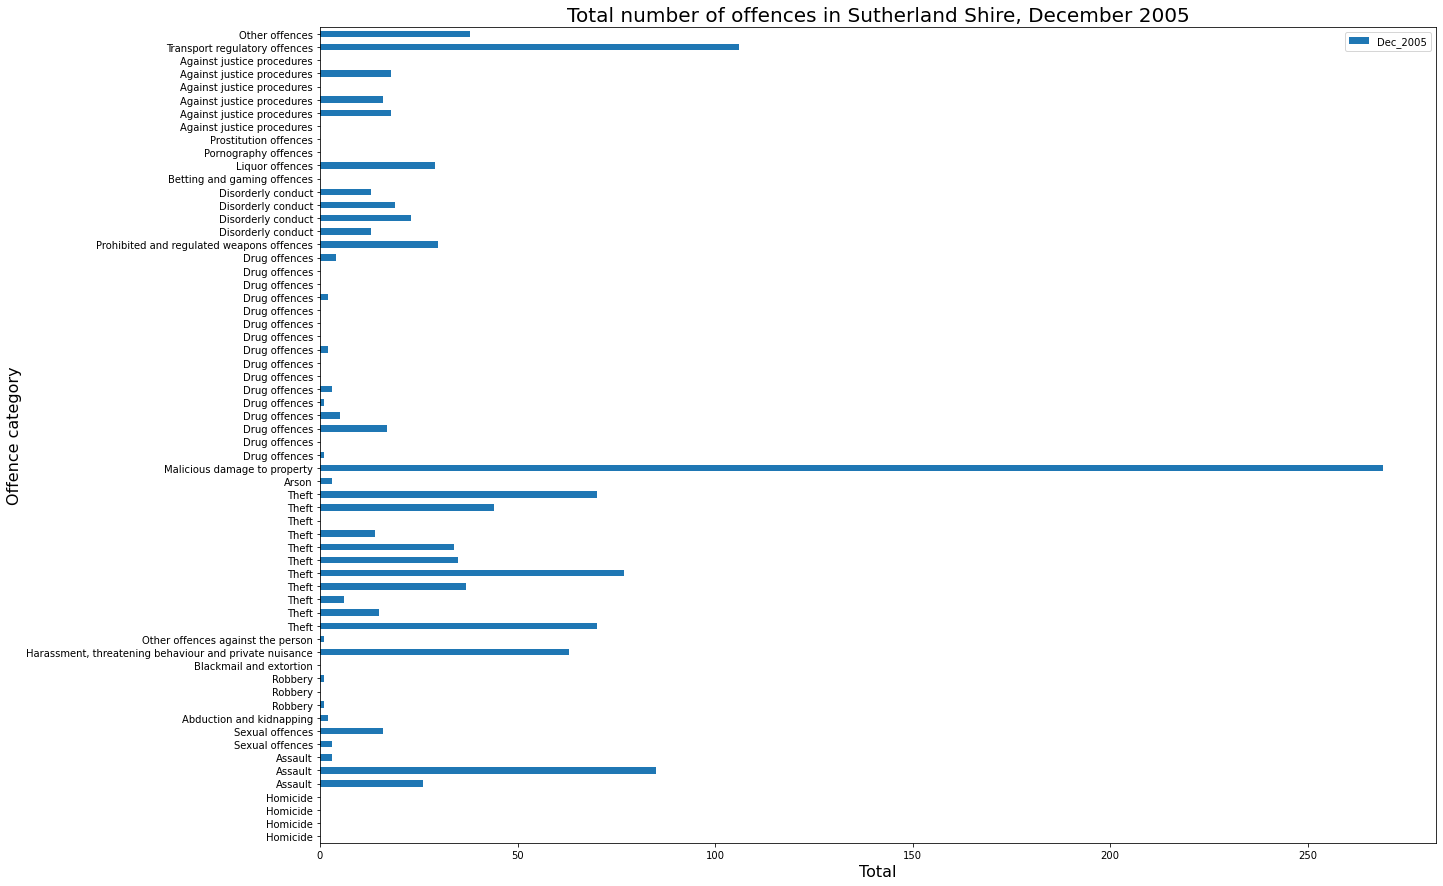

In [76]:
crime_data_Sutho.set_index('Offence category').plot(kind="barh")
plt.ylabel('Offence category', fontsize = 16)
plt.xlabel('Total', fontsize = 16)
plt.title("Total number of offences in Sutherland Shire, December 2005", fontsize=20)

Crime Data in Sutherland Shire (LGA) in December 2005 on Theft (Offence Category)

In [34]:
StGeorge_Sutho_group = crime_data.groupby(['Statistical Division'])
StGeorge_Sutho = StGeorge_Sutho_group.get_group('St George-Sutherland')

crime_data_St_Sutho_2 = StGeorge_Sutho[['LGA','Offence category','Subcategory','Dec_2005']]


Sutho_group = crime_data_St_Sutho_2.groupby(['LGA'])
Sutherland_Shire = Sutho_group.get_group('Sutherland Shire')

crime_data_Sutho_2 = Sutherland_Shire[['LGA','Offence category','Subcategory','Dec_2005']]


Sutho_Theft_group = crime_data_Sutho_2.groupby(['Offence category'])
Sutherland_Shire_Theft = Sutho_Theft_group.get_group('Theft')

crime_data_Sutho_Theft = Sutherland_Shire_Theft[['LGA','Offence category','Subcategory','Dec_2005']]
crime_data_Sutho_Theft.head(11)

,LGA,Offence category,Subcategory,Dec_2005
636,Sutherland Shire,Theft,Break and enter dwelling,70.0
637,Sutherland Shire,Theft,Break and enter non-dwelling,15.0
638,Sutherland Shire,Theft,Receiving or handling stolen goods,6.0
639,Sutherland Shire,Theft,Motor vehicle theft,37.0
640,Sutherland Shire,Theft,Steal from motor vehicle,77.0
641,Sutherland Shire,Theft,Steal from retail store,35.0
642,Sutherland Shire,Theft,Steal from dwelling,34.0
643,Sutherland Shire,Theft,Steal from person,14.0
644,Sutherland Shire,Theft,Stock theft,0.0
645,Sutherland Shire,Theft,Fraud,44.0


Text(0.5, 1.0, 'Number of Theft offences in Sutherland Shire, December 2005')

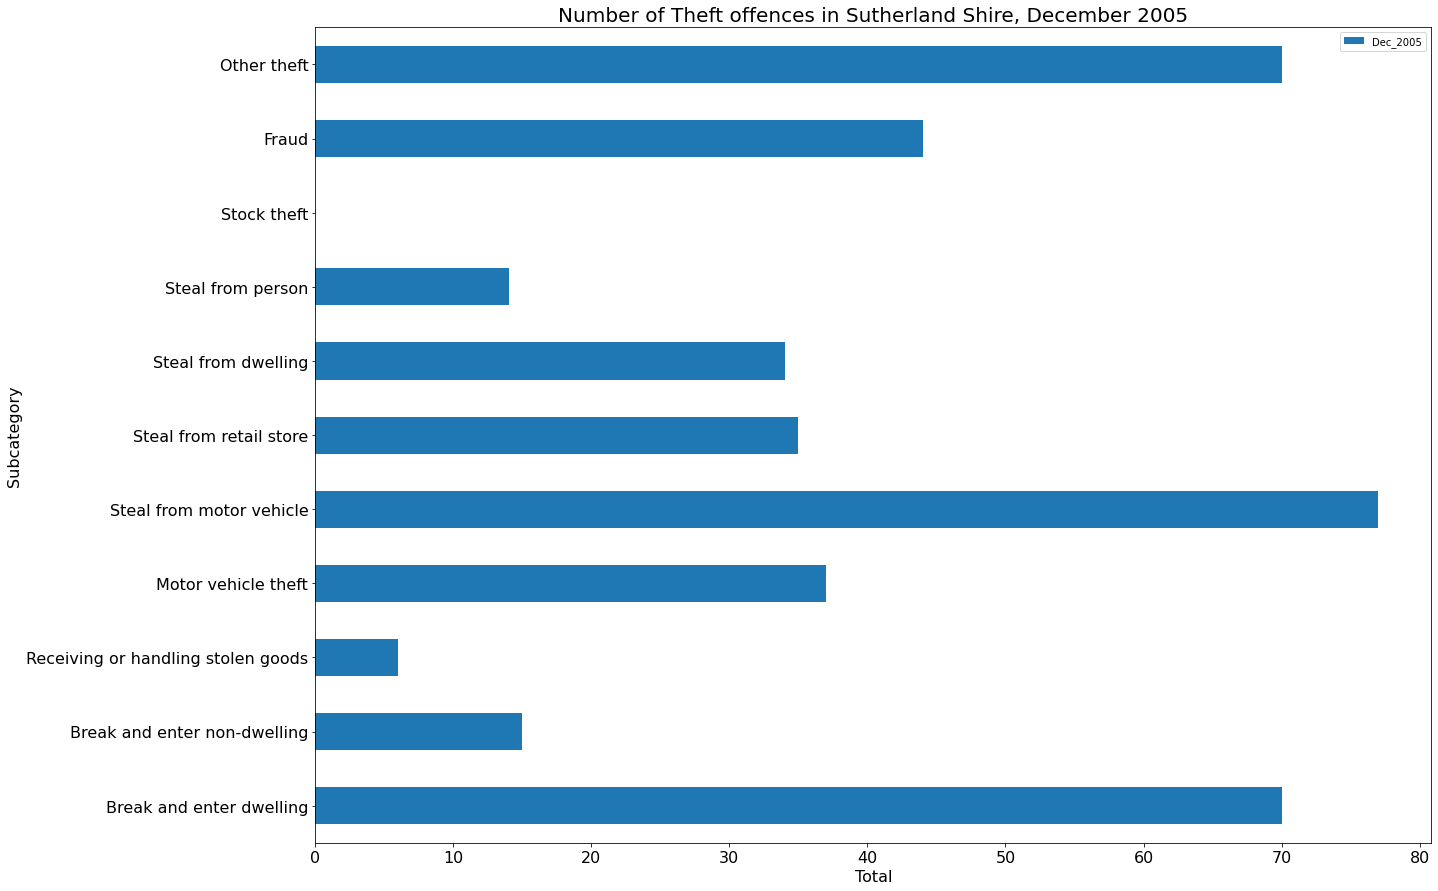

In [72]:
Sutho_Theft = crime_data_Sutho_Theft.set_index('Subcategory').plot(kind="barh", fontsize = 16)
plt.ylabel('Subcategory', fontsize = 16)
plt.xlabel('Total', fontsize = 16)
plt.title("Number of Theft offences in Sutherland Shire, December 2005", fontsize=20)

Crime Data in Sutherland Shire (LGA) in December 2005 on Assult (Offence Category)

In [36]:
Sutho_Theft_group = crime_data_Sutho_2.groupby(['Offence category'])
Sutherland_Shire_Assault = Sutho_Theft_group.get_group('Assault')

crime_data_Sutho_Assault = Sutherland_Shire_Assault[['LGA','Offence category','Subcategory','Dec_2005']]
crime_data_Sutho_Assault.head(4)

,LGA,Offence category,Subcategory,Dec_2005
624,Sutherland Shire,Assault,Domestic violence related assault,26.0
625,Sutherland Shire,Assault,Non-domestic violence related assault,85.0
626,Sutherland Shire,Assault,Assault Police,3.0


Text(0.5, 1.0, 'Number of Assault offences in Sutherland Shire, December 2005')

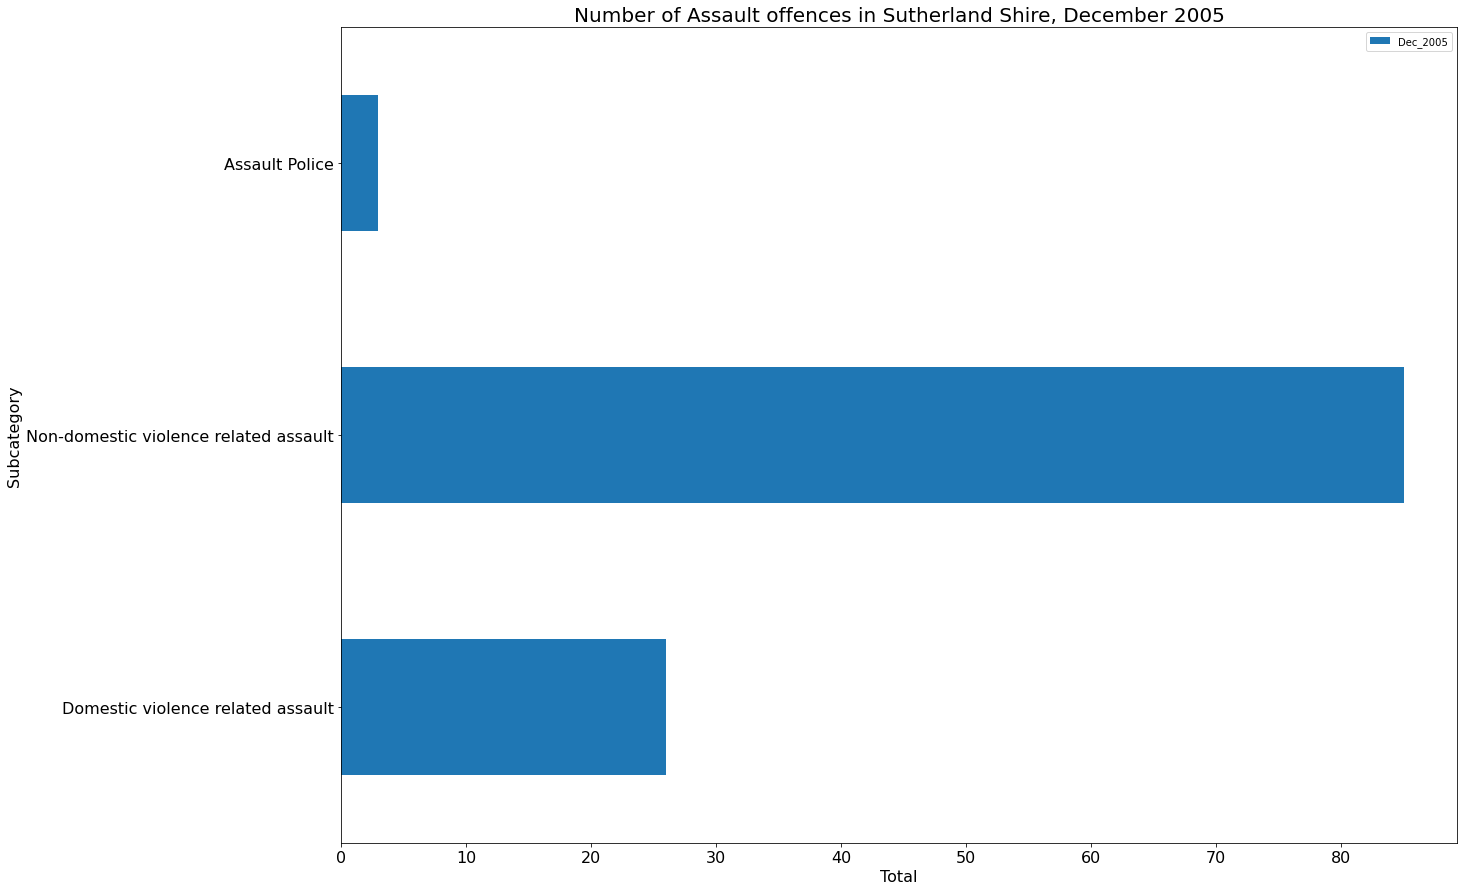

In [73]:
crime_data_Sutho_Assault.set_index('Subcategory').plot(kind="barh", fontsize = 16)
plt.ylabel('Subcategory', fontsize = 16)
plt.xlabel('Total', fontsize = 16)
plt.title("Number of Assault offences in Sutherland Shire, December 2005", fontsize=20)

Crime Data in Sydney (LGA) in December 2005 on Theft (Offence Category)

In [38]:
Inner_Sydney_group = crime_data.groupby(['Statistical Division'])
Inner_Sydney = Inner_Sydney_group.get_group('Inner Sydney')

crime_data_Inner_Syd = Inner_Sydney[['LGA','Offence category','Subcategory','Dec_2005']]


Syd_group = crime_data_Inner_Syd.groupby(['LGA'])
Sydney = Syd_group.get_group('Sydney')

crime_data_Sydney = Sydney[['LGA','Offence category','Subcategory','Dec_2005']]


Syd_Theft_group = crime_data_Sydney.groupby(['Offence category'])
Sydney_Theft = Syd_Theft_group.get_group('Theft')

crime_data_Sydney_Theft = Sydney_Theft[['LGA','Offence category','Subcategory','Dec_2005']]
crime_data_Sydney_Theft.head(11)

,LGA,Offence category,Subcategory,Dec_2005
202,Sydney,Theft,Break and enter dwelling,232.0
203,Sydney,Theft,Break and enter non-dwelling,195.0
204,Sydney,Theft,Receiving or handling stolen goods,68.0
205,Sydney,Theft,Motor vehicle theft,108.0
206,Sydney,Theft,Steal from motor vehicle,407.0
207,Sydney,Theft,Steal from retail store,111.0
208,Sydney,Theft,Steal from dwelling,111.0
209,Sydney,Theft,Steal from person,386.0
210,Sydney,Theft,Stock theft,0.0
211,Sydney,Theft,Fraud,299.0


Text(0.5, 1.0, 'Number of Theft offences in Sydney, December 2005')

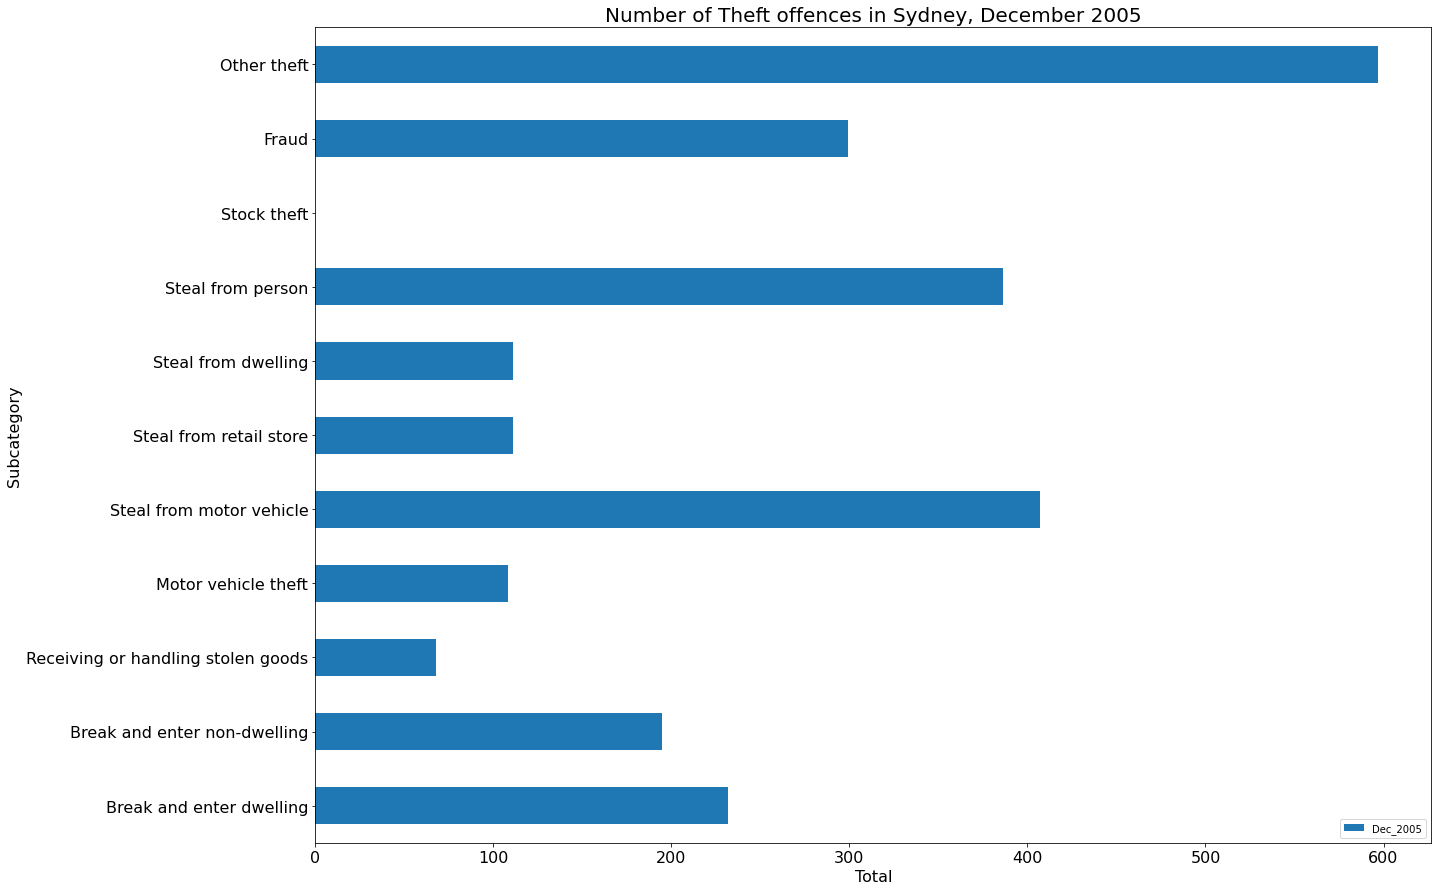

In [74]:
Syd_Theft = crime_data_Sydney_Theft.set_index('Subcategory').plot(kind="barh", fontsize = 16)
plt.ylabel('Subcategory', fontsize = 16)
plt.xlabel('Total', fontsize = 16)
plt.title("Number of Theft offences in Sydney, December 2005", fontsize=20)

Crime Data in Sydney (LGA) in December 2005 on Assault (Offence Category)

In [40]:
Syd_Theft_group = crime_data_Sydney.groupby(['Offence category'])
Sydney_Assault = Syd_Theft_group.get_group('Assault')

crime_data_Sydney_Assault = Sydney_Assault[['LGA','Offence category','Subcategory','Dec_2005']]
crime_data_Sydney_Assault.head(4)

,LGA,Offence category,Subcategory,Dec_2005
190,Sydney,Assault,Domestic violence related assault,79.0
191,Sydney,Assault,Non-domestic violence related assault,409.0
192,Sydney,Assault,Assault Police,31.0


Text(0.5, 1.0, 'Number of Theft offences in Sydney, December 2005')

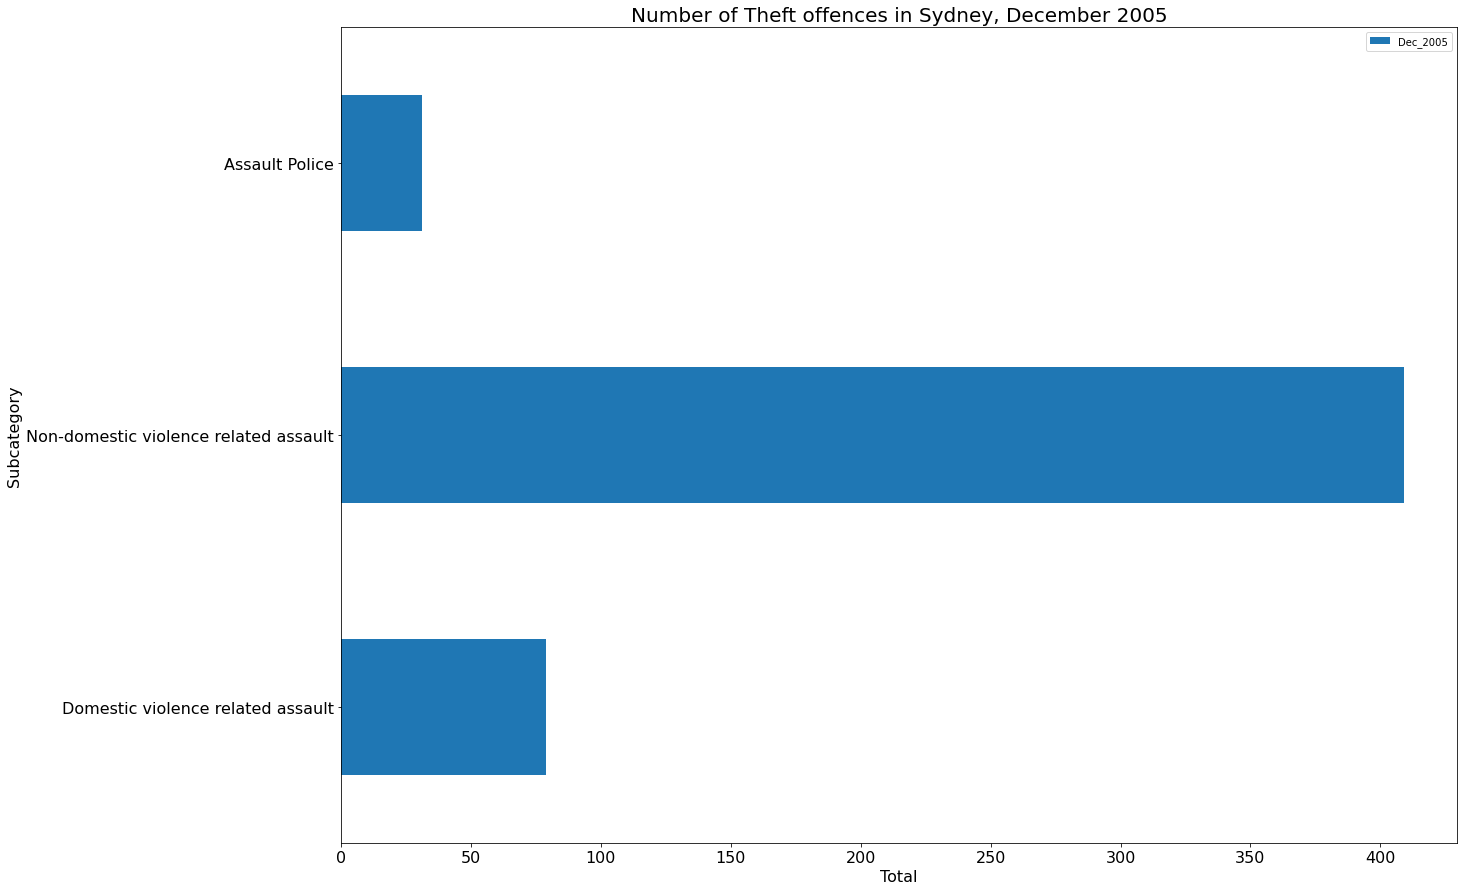

In [75]:
crime_data_Sydney_Assault.set_index('Subcategory').plot(kind="barh", fontsize = 16)
plt.ylabel('Subcategory', fontsize = 16)
plt.xlabel('Total', fontsize = 16)
plt.title("Number of Theft offences in Sydney, December 2005", fontsize=20)

Comparision of Crime Data on Theft (Offence category) between Sutherland Shire and Sydney (LGA) in Decemeber 2005

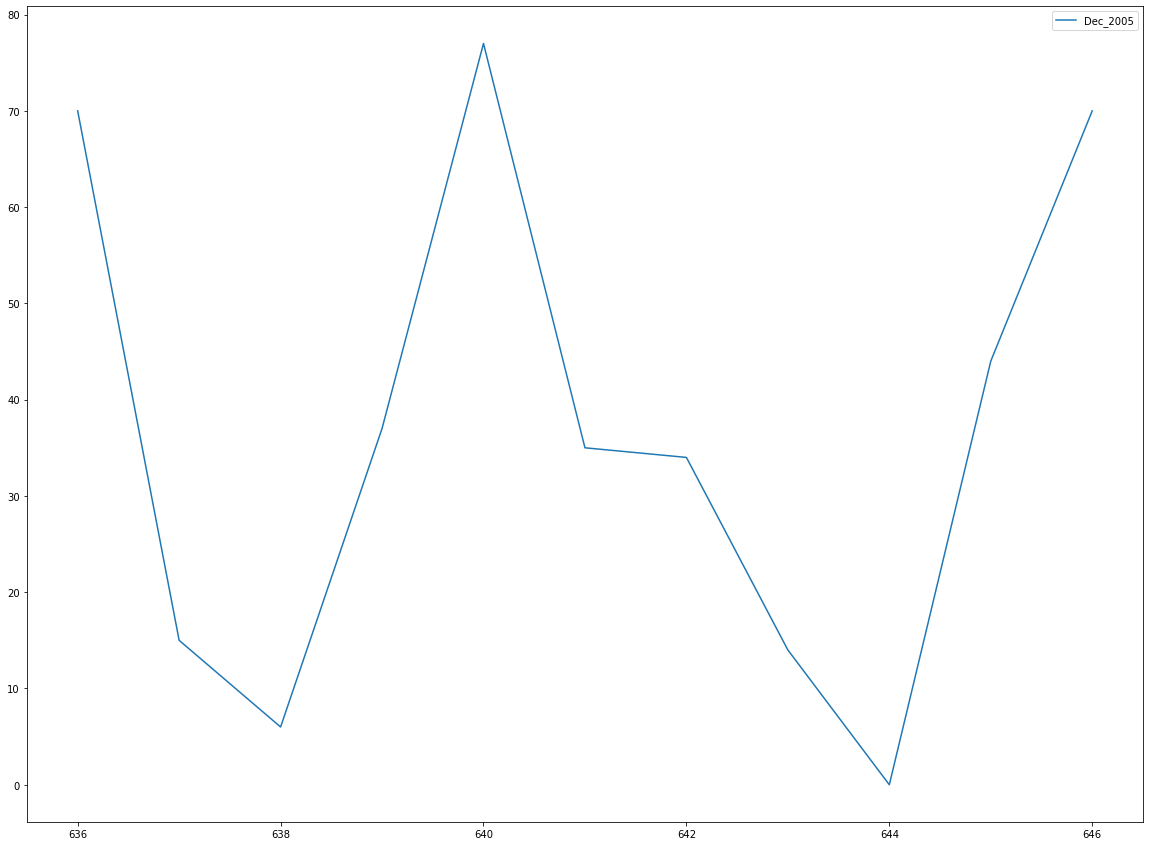

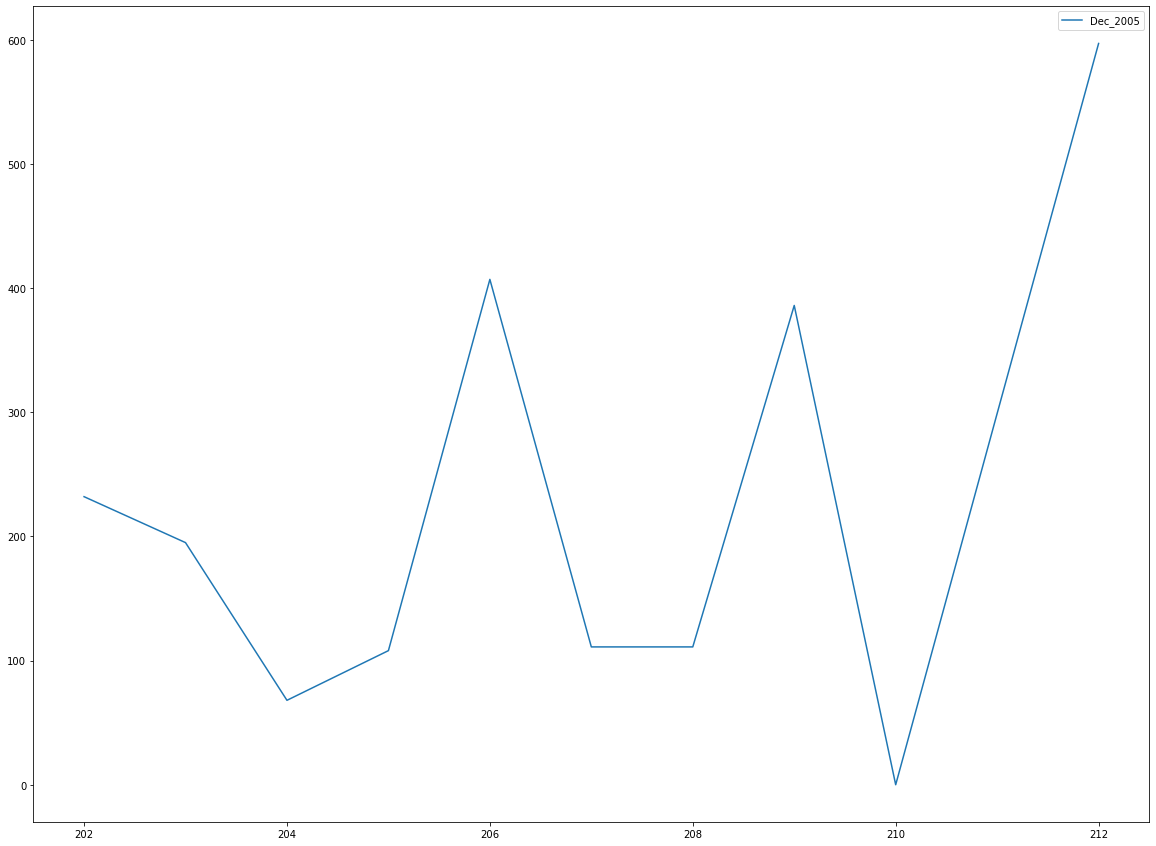

In [71]:
crime_data_Sutho_Theft.plot()
crime_data_Sydney_Theft.plot()
plt.show()

Comparision of Crime Data on Assault (Offence category) between Sutherland Shire and Sydney (LGA) in December 2005

Overall Theft (Offence category) in Sutherland Shire between 2005 and 2012

In [44]:
StGeorge_Sutho_group = crime_data.groupby(['Statistical Division'])
StGeorge_Sutho = StGeorge_Sutho_group.get_group('St George-Sutherland')

crime_data_St_Sutho_2 = StGeorge_Sutho[['LGA','Offence category','Subcategory','Dec_2005':'Dec_2012']]


Sutho_group = crime_data_St_Sutho_2.groupby(['LGA'])
Sutherland_Shire = Sutho_group.get_group('Sutherland Shire')

crime_data_Sutho_2 = Sutherland_Shire[['LGA','Offence category','Subcategory','Dec_2005':'Dec_2012']]


Sutho_Theft_group = crime_data_Sutho_2.groupby(['Offence category'])
Sutherland_Shire_Theft = Sutho_Theft_group.get_group('Theft')

crime_data_Sutho_Theft = Sutherland_Shire_Theft[['LGA','Offence category','Subcategory','Dec_2005':'Dec_2012']]
crime_data_Sutho_Theft.head(11)

SyntaxError: invalid syntax (<ipython-input-44-069ba00e79fe>, line 4)